In [0]:
# On importe le dataset et on le dezippe
from zipfile import ZipFile
file_name ='cell_images.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Perfecto')

Perfecto


In [0]:
%tensorflow_version 1.15

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [0]:
#Import des librairies
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
# On donne un format adequat aux images pour etre donnees au modele VGG16
IMAGE_SIZE = [224, 224]
train_path = '/cell_images/Train'
valid_path = '/cell_images/Test'

In [0]:
# On initialise le modele avec les poids imagenet
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)





58892288/58889256 [==============================] - 3s 0us/step








In [0]:
# On n'entraine pas les couches existantes
for layer in vgg.layers:
  layer.trainable = False

 # pour obtenir le nb de classes
folders = glob('cell_images/Train/*')
  

# les couches
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

# On cree le modele
model = Model(inputs=vgg.input, outputs=prediction)

# Structure du modele
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
# On choisit les fonctions cout et optimizer
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


# Import des images et augmentation de data

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('cell_images/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('cell_images/Test',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')


# On fit le modele
epoch_history = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)



Found 22038 images belonging to 2 classes.
Found 5520 images belonging to 2 classes.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
345/345 [==============================] - 252s 731ms/step - loss: 0.3119 - acc: 0.8738 - val_loss: 0.2434 - val_acc: 0.9063
Epoch 2/5
345/345 [==============================] - 236s 685ms/step - loss: 0.1962 - acc: 0.9269 - val_loss: 0.1995 - val_acc: 0.9310
Epoch 3/5
345/345 [==============================] - 236s 685ms/step - loss: 0.1827 - acc: 0.9312 - val_loss: 0.2172 - val_acc: 0.9241
Epoch 4/5
345/345 [==============================] - 236s 685ms/step - loss: 0.1700 - acc: 0.9362 - val_loss: 0.1828 - val_acc: 0.9332
Epoch 5/5
345/345 [==============================] - 236s 684ms/step - loss: 0.1674 - acc: 0.9382 - val_loss: 0.1777 - val_acc: 0.9373


In [0]:
#On enregistre le modele -- meilleure perf que vgg19 (0.9208)
model.save('20200330_vgg16_94.h5')

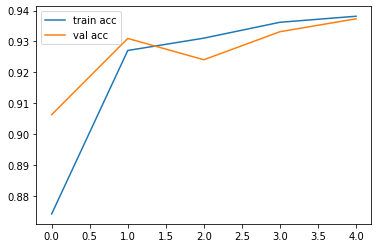

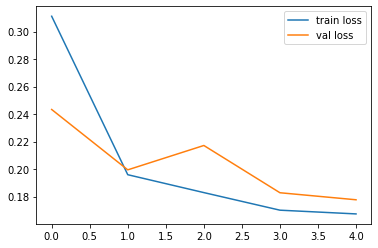

<Figure size 432x288 with 0 Axes>

In [0]:
# Courbe de l'accuracy
plt.plot(epoch_history.history['acc'], label='train acc')
plt.plot(epoch_history.history['val_acc'], label='val acc')
plt.legend()
plt.show()


# Courbe de la loss
plt.plot(epoch_history.history['loss'], label='train loss')
plt.plot(epoch_history.history['val_loss'], label='val loss')
plt.legend()
plt.show()


